In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
len(df.columns)

81

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
df.shape

(1460, 81)

# if duplicate, remove

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1460, 81)

<AxesSubplot:>

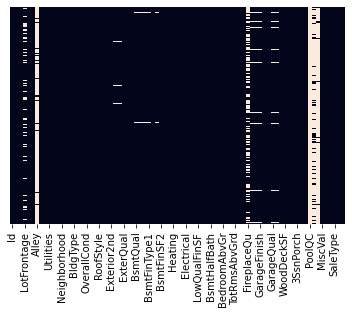

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)#see the null value with the help of heatmap

# Filling the missing value

In [14]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage']).mean()

In [15]:
df.drop(['Alley'],axis=1,inplace=True)

In [16]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [17]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [18]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [19]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [20]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [21]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [22]:
df.shape

(1460, 76)

In [23]:
#df.drop(['Id'],axis=1,inplace=True)

In [24]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])



<AxesSubplot:>

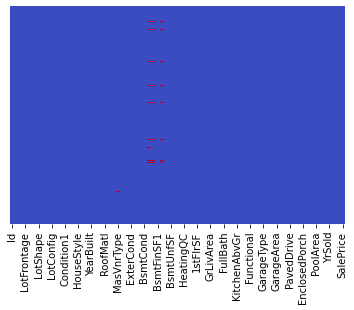

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [29]:
df.shape

(1460, 76)

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,70.049958,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,70.049958,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,70.049958,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,70.049958,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,70.049958,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
df.Utilities.value_counts

<bound method IndexOpsMixin.value_counts of 0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object>

# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [33]:
from pandas.core.dtypes.common import is_numeric_dtype

In [34]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,70.049958,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,70.049958,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,70.049958,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,70.049958,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,70.049958,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


# Feature selection

In [36]:
x=df.drop(['SalePrice'],axis=1)

In [37]:
y=df.SalePrice

In [38]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,70.049958,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,70.049958,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,70.049958,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,70.049958,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,70.049958,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,70.049958,7917,1,3,3,0,4,...,40,0,0,0,0,0,8,2007,8,4
1456,1457,20,3,70.049958,13175,1,3,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
1457,1458,70,3,70.049958,9042,1,3,3,0,4,...,60,0,0,0,0,2500,5,2010,8,4
1458,1459,20,3,70.049958,9717,1,3,3,0,4,...,0,112,0,0,0,0,4,2010,8,4


In [39]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
from sklearn.ensemble import ExtraTreesClassifier  #decision tree
extra=ExtraTreesClassifier()

In [41]:
extra.fit(x,y)

ExtraTreesClassifier()

In [42]:
feature_importance=extra.feature_importances_

In [43]:
feature_importance

array([3.14379979e-02, 1.56800076e-02, 9.41873727e-03, 0.00000000e+00,
       2.89985816e-02, 3.08686823e-04, 1.45624159e-02, 7.13149513e-03,
       6.18527388e-05, 1.63182899e-02, 3.60549608e-03, 2.28428816e-02,
       9.08725748e-03, 7.48384000e-04, 7.39854100e-03, 1.28317754e-02,
       2.22147051e-02, 1.67384980e-02, 2.84593073e-02, 2.70145707e-02,
       1.18250221e-02, 1.09013574e-03, 1.92376782e-02, 2.01130055e-02,
       1.53868591e-02, 1.81294924e-02, 8.83098613e-03, 8.26694557e-03,
       1.12217219e-02, 1.20113589e-02, 6.07103716e-03, 1.73363606e-02,
       2.05332372e-02, 2.54407949e-02, 7.77931625e-03, 7.24080647e-03,
       2.87449761e-02, 2.83096288e-02, 1.37510896e-03, 1.59597729e-02,
       3.72107137e-03, 5.58789806e-03, 2.87075190e-02, 1.80818826e-02,
       1.27849527e-03, 3.08638596e-02, 1.42940588e-02, 4.29773035e-03,
       9.70774370e-03, 1.13188594e-02, 1.75690273e-02, 2.30639194e-03,
       1.27287823e-02, 2.41885055e-02, 5.10198141e-03, 1.57125778e-02,
      

In [44]:
imp=pd.DataFrame(feature_importance,columns=['Gain_score'])

In [45]:
imp

,Gain_score
0,0.031438
1,0.015680
2,0.009419
3,0.000000
4,0.028999
...,...
70,0.002959
71,0.029515
72,0.026802
73,0.008233


In [46]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

# column concatenation

In [47]:
cols=pd.DataFrame(x.columns,columns=['Features_Names'])

In [48]:
cols.head()

,Features_Names
0,Id
1,MSSubClass
2,MSZoning
3,LotFrontage
4,LotArea


In [49]:
gains=pd.concat([cols,imp],axis=1)

In [50]:
gains

,Features_Names,Gain_score
0,Id,0.031438
1,MSSubClass,0.015680
2,MSZoning,0.009419
3,LotFrontage,0.000000
4,LotArea,0.028999
...,...,...
70,MiscVal,0.002959
71,MoSold,0.029515
72,YrSold,0.026802
73,SaleType,0.008233


In [51]:
gains.nlargest(15,'Gain_score')

,Features_Names,Gain_score
0,Id,0.031438
45,GrLivArea,0.030864
71,MoSold,0.029515
4,LotArea,0.028999
36,BsmtUnfSF,0.028745
42,1stFlrSF,0.028708
60,GarageArea,0.028691
18,YearBuilt,0.028459
37,TotalBsmtSF,0.028310
19,YearRemodAdd,0.027015


In [52]:
x=df[['Id','GrLivArea','1stFlrSF','LotArea','TotalBsmtSF','BsmtUnfSF','GarageArea','YrSold','MoSold','YearRemodAdd','YearBuilt','BsmtFinSF1','TotRmsAbvGrd','Neighborhood','OpenPorchSF']]

In [53]:
x

,Id,GrLivArea,1stFlrSF,LotArea,TotalBsmtSF,BsmtUnfSF,GarageArea,YrSold,MoSold,YearRemodAdd,YearBuilt,BsmtFinSF1,TotRmsAbvGrd,Neighborhood,OpenPorchSF
0,1,1710,856,8450,856,150,548,2008,2,2003,2003,706,8,5,61
1,2,1262,1262,9600,1262,284,460,2007,5,1976,1976,978,6,24,0
2,3,1786,920,11250,920,434,608,2008,9,2002,2001,486,6,5,42
3,4,1717,961,9550,756,540,642,2006,2,1970,1915,216,7,6,35
4,5,2198,1145,14260,1145,490,836,2008,12,2000,2000,655,9,15,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1647,953,7917,953,953,460,2007,8,2000,1999,0,7,8,40
1456,1457,2073,2073,13175,1542,589,500,2010,2,1988,1978,790,7,14,0
1457,1458,2340,1188,9042,1152,877,252,2010,5,2006,1941,275,9,6,60
1458,1459,1078,1078,9717,1078,0,240,2010,4,1996,1950,49,5,12,0


In [54]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [55]:
gains.nsmallest(15,'Gain_score')

,Features_Names,Gain_score
3,LotFrontage,0.000000
8,Utilities,0.000062
5,Street,0.000309
69,PoolArea,0.000381
13,Condition2,0.000748
21,RoofMatl,0.001090
44,LowQualFinSF,0.001278
38,Heating,0.001375
67,3SsnPorch,0.001709
51,KitchenAbvGr,0.002306


# Random forest classifier

In [80]:
 from sklearn.ensemble import RandomForestClassifier

In [81]:
model3=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=100)

In [82]:
model3.fit(x,y)

RandomForestClassifier(max_depth=5, random_state=100)

# Loading testing data

In [56]:
df1=pd.read_csv('test.csv')

In [57]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [58]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
len(df1.columns)

80

In [60]:
df1.shape

(1459, 80)

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [62]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [63]:
df1['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

# if duplicate,remove

In [64]:
df1.drop_duplicates(inplace=True)

In [65]:
df1.shape

(1459, 80)

In [66]:
df1['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage']).mean()
df1['MSZoning']=df['MSZoning'].fillna(df['MSZoning']).mean()

In [67]:
df1.drop(['Alley'],axis=1,inplace=True)

In [68]:
df1['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df1['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


In [69]:
df1['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df1['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])




In [70]:
df1.drop(['GarageYrBlt'],axis=1,inplace=True)

In [71]:
df1['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df1['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df1['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [72]:
df1.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [73]:
df1.shape

(1459, 75)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   float64
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [75]:
df1['GarageCars']=df['GarageCars'].fillna(df['GarageCars']).mean()
df1['GarageArea']=df['GarageArea'].fillna(df['GarageArea']).mean()
df1['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1']).mean()
df1['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2']).mean()
df1['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea']).mean()
df1['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df1['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df1['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df1['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df1['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df1['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df1['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df1['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF']).mean()
df1['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF']).mean()
df1['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath']).mean()
df1['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath']).mean()
df1['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df1['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
df1['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   float64
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Again Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()

In [78]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df1.columns:
    if is_numeric_dtype(df1[column]):
        continue
    else:
        df1[column]=label1.fit_transform(df1[column])

In [79]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3.028767,70.049958,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3.028767,70.049958,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3.028767,70.049958,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3.028767,70.049958,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3.028767,70.049958,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


# Prediction

In [84]:
features=['Id','GrLivArea','1stFlrSF','LotArea','TotalBsmtSF','BsmtUnfSF','GarageArea','YrSold','MoSold','YearRemodAdd','YearBuilt','BsmtFinSF1','TotRmsAbvGrd','Neighborhood','OpenPorchSF']

In [85]:
x_test=pd.get_dummies(df1[features])

In [86]:
predictions=model3.predict(x_test)

In [87]:
predictions

array([142125, 147500, 266500, ..., 142125, 142125, 266500], dtype=int64)

In [88]:
output=pd.DataFrame({'Id':df1.Id,'SalePrice':predictions})

In [89]:
output.to_csv('my_submission.csv',index=False)

In [90]:
print('csv generated')

csv generated
